In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D # Changed 'form' to 'from'
from tensorflow.keras.optimizers import Adam,SGD,Adagrad
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [17]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32')/255.0


In [18]:
def create_model():
  model = Sequential([Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),MaxPooling2D((2,2)),Conv2D(64,(3,3),activation='relu'),MaxPooling2D((2,2)),Flatten(),Dense(64,activation='relu'),Dense(10,activation='softmax')])
  return model

In [19]:
model = create_model()
initial_weights = model.get_weights()


Training with SGD...
Completed SGD | Test accuracy: 0.9778

Training with Adam...
Completed Adam | Test accuracy: 0.9835

Training with Adagrad...
Completed Adagrad | Test accuracy: 0.9861


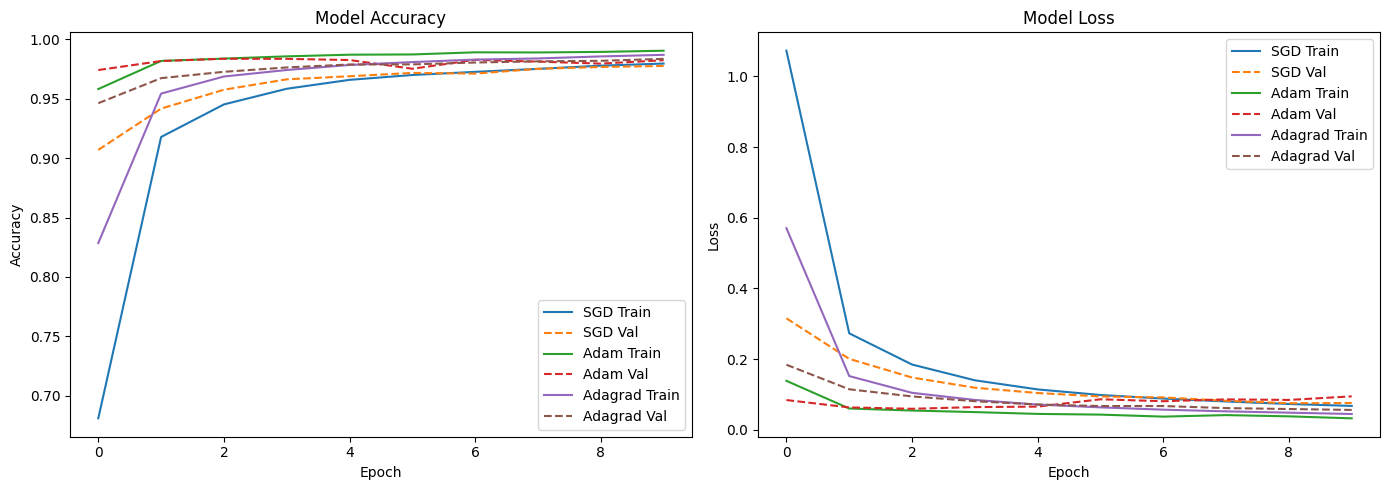


Test Results:
SGD:
  Test Loss: 0.0667
  Test Accuracy: 0.9778

Adam:
  Test Loss: 0.0971
  Test Accuracy: 0.9835

Adagrad:
  Test Loss: 0.0458
  Test Accuracy: 0.9861



In [20]:
optimizers={
    'SGD':SGD(learning_rate=0.01),
    'Adam':Adam(learning_rate=0.01),
    'Adagrad':Adagrad(learning_rate=0.01)

}

epochs = 10
batch_size = 64
histories = {}
test_results = {}
for opt_name in optimizers:
    print(f"\nTraining with {opt_name}...")

    # Create new model with initial weights
    model = create_model()
    model.set_weights(initial_weights)

    # Compile model with current optimizer
    model.compile(optimizer=optimizers[opt_name],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train model
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=0)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    # Store results
    histories[opt_name] = history.history
    test_results[opt_name] = {'Test Loss': test_loss, 'Test Accuracy': test_acc}

    print(f"Completed {opt_name} | Test accuracy: {test_acc:.4f}")

# Plot training and validation metrics
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
for opt_name in histories:
    plt.plot(histories[opt_name]['accuracy'], label=f'{opt_name} Train')
    plt.plot(histories[opt_name]['val_accuracy'], '--', label=f'{opt_name} Val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
for opt_name in histories:
    plt.plot(histories[opt_name]['loss'], label=f'{opt_name} Train')
    plt.plot(histories[opt_name]['val_loss'], '--', label=f'{opt_name} Val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Print test results
print("\nTest Results:")
for opt_name, results in test_results.items():
    print(f"{opt_name}:")
    print(f"  Test Loss: {results['Test Loss']:.4f}")
    print(f"  Test Accuracy: {results['Test Accuracy']:.4f}\n")